 ### In this project we are going to analysis the air quality of Hyderabad in the nationwide lockdown:
 ### Phase 1: 25 March 2020 – 14 April 2020 (21 days)
 ### Phase 2: 15 April 2020 – 3 May 2020 (19 days)
 ### Phase 3: 4 May 2020 – 17 May 2020 (14 days)
 ### Phase 4: 18 May 2020 – 31 May 2020 (14 days)
 
 ### Can download data from [aqicn](https://aqicn.org/data-platform/register/) or can use API : waqi.info
 ### To check the Air Quality Index Scale and Color Legend [click](https://aqicn.org/faq/2015-05-15/india-national-air-quality-index/)

In [318]:
'''for waqi API
import requests
city='Hyderabad'
api_key=#'add your API key here'
url='http://api.waqi.info/feed/'+city+'/?token='+api_key
r=requests.get(url)
data=r.json()
data'''

"for waqi API\nimport requests\ncity='Hyderabad'\napi_key=#'add your API key here'\nurl='http://api.waqi.info/feed/'+city+'/?token='+api_key\nr=requests.get(url)\ndata=r.json()\ndata"

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [320]:
#using the data from 
data=pd.read_csv("central-university, hyderabad, india-air-quality.csv")
data.head(10)

,date,pm25,pm10,o3,no2,so2,co
0,23/06/2021,86.0,51.0,10.0,11.0,4.29,2.0
1,22/06/2021,96.0,72.0,8.0,10.0,4.00,2.0
2,21/06/2021,108.0,82.0,9.0,10.0,5.00,2.0
3,20/06/2021,63.0,85.0,7.0,9.0,5.00,1.0
4,19/06/2021,43.0,53.0,10.0,8.0,5.00,1.0
5,18/06/2021,53.0,33.0,9.0,7.0,5.00,1.0
6,17/06/2021,20.0,43.0,6.0,7.0,6.00,1.0
7,16/06/2021,11.0,19.0,9.0,7.0,5.00,1.0
8,15/06/2021,15.0,16.0,8.0,7.0,8.00,2.0
9,14/06/2021,18.0,12.0,8.0,7.0,5.00,2.0


In [321]:
data.info()
#no missing data is present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1089 non-null   object 
 1    pm25   1089 non-null   float64
 2    pm10   1089 non-null   float64
 3    o3     1089 non-null   float64
 4    no2    1089 non-null   float64
 5    so2    1089 non-null   float64
 6    co     1088 non-null   float64
dtypes: float64(6), object(1)
memory usage: 59.7+ KB


In [322]:
data['date']=pd.to_datetime(data['date'])

In [323]:
data.columns
#please check in some columns space is present before the name of column

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1089 non-null   datetime64[ns]
 1    pm25   1089 non-null   float64       
 2    pm10   1089 non-null   float64       
 3    o3     1089 non-null   float64       
 4    no2    1089 non-null   float64       
 5    so2    1089 non-null   float64       
 6    co     1088 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 59.7 KB


In [325]:
data.set_index('date',inplace=True)
data

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2021-06-23,86.0,51.0,10.0,11.0,4.29,2.0
2021-06-22,96.0,72.0,8.0,10.0,4.00,2.0
2021-06-21,108.0,82.0,9.0,10.0,5.00,2.0
2021-06-20,63.0,85.0,7.0,9.0,5.00,1.0
2021-06-19,43.0,53.0,10.0,8.0,5.00,1.0
...,...,...,...,...,...,...
2017-11-16,103.0,60.0,26.0,20.0,6.00,8.0
2017-11-15,126.0,66.0,29.0,16.0,5.00,9.0
2017-11-14,128.0,78.0,34.0,20.0,8.00,9.0


In [326]:
data.describe()

,pm25,pm10,o3,no2,so2,co
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1088.000000
mean,98.359412,63.329302,26.599265,15.300184,4.286602,4.611461
std,40.830688,23.995035,15.051519,8.069433,2.246593,4.148245
min,6.000000,7.000000,1.000000,1.000000,1.000000,1.000000
25%,66.000000,46.000000,15.000000,10.000000,3.000000,3.000000
50%,98.800000,66.000000,25.000000,14.000000,4.290000,4.000000
75%,133.000000,82.000000,37.000000,19.000000,5.000000,5.000000
max,235.000000,113.000000,231.000000,50.000000,18.000000,89.000000


In [327]:
#divide the data into phase of lockdown
phase1=data.loc['2020-03-25':'2020-04-14'].copy()
phase2=data.loc['2020-04-15':'2020-05-03'].copy()
phase3=data.loc['2020-05-04':'2020-05-17'].copy()
phase4=data.loc['2020-05-18':'2020-05-31'].copy()

In [328]:
#to check if the values are imported correctly
print(len(phase1),len(phase2),len(phase3),len(phase4))

21 19 14 14


# Now let us first check the basic definitions using [link](https://www.airqualitynow.eu/pollution_home.php)

In [329]:
phase1[' Lockdown phase']=1
phase2[' Lockdown phase']=2
phase3[' Lockdown phase']=3
phase4[' Lockdown phase']=4
phase1.head()

,pm25,pm10,o3,no2,so2,co,Lockdown phase
date,,,,,,,
2020-04-12,128.0,79.0,31.0,17.0,4.0,4.0,1
2020-04-11,154.0,94.0,34.0,19.0,6.0,4.0,1
2020-04-10,127.0,66.0,21.0,10.0,7.0,3.0,1
2020-04-09,74.0,39.0,29.0,11.0,6.0,2.0,1
2020-04-08,41.0,16.0,12.0,5.0,1.0,1.0,1


In [330]:
phase=pd.concat([phase1,phase2,phase3,phase4])
phase.head()

,pm25,pm10,o3,no2,so2,co,Lockdown phase
date,,,,,,,
2020-04-12,128.0,79.0,31.0,17.0,4.0,4.0,1
2020-04-11,154.0,94.0,34.0,19.0,6.0,4.0,1
2020-04-10,127.0,66.0,21.0,10.0,7.0,3.0,1
2020-04-09,74.0,39.0,29.0,11.0,6.0,2.0,1
2020-04-08,41.0,16.0,12.0,5.0,1.0,1.0,1


<AxesSubplot:>

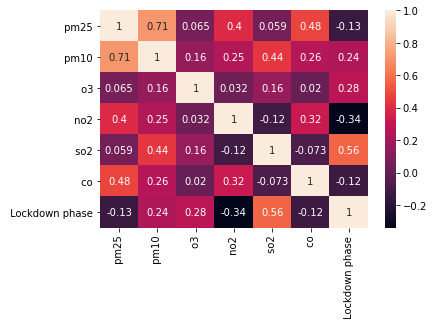

In [331]:
sns.heatmap(phase.corr(),annot=True)

* Heatmap shows that pm25 and pm10 are highly correlated
* In Hyderabad the reason for PM25 NO2 and CO and PM10 is SO2

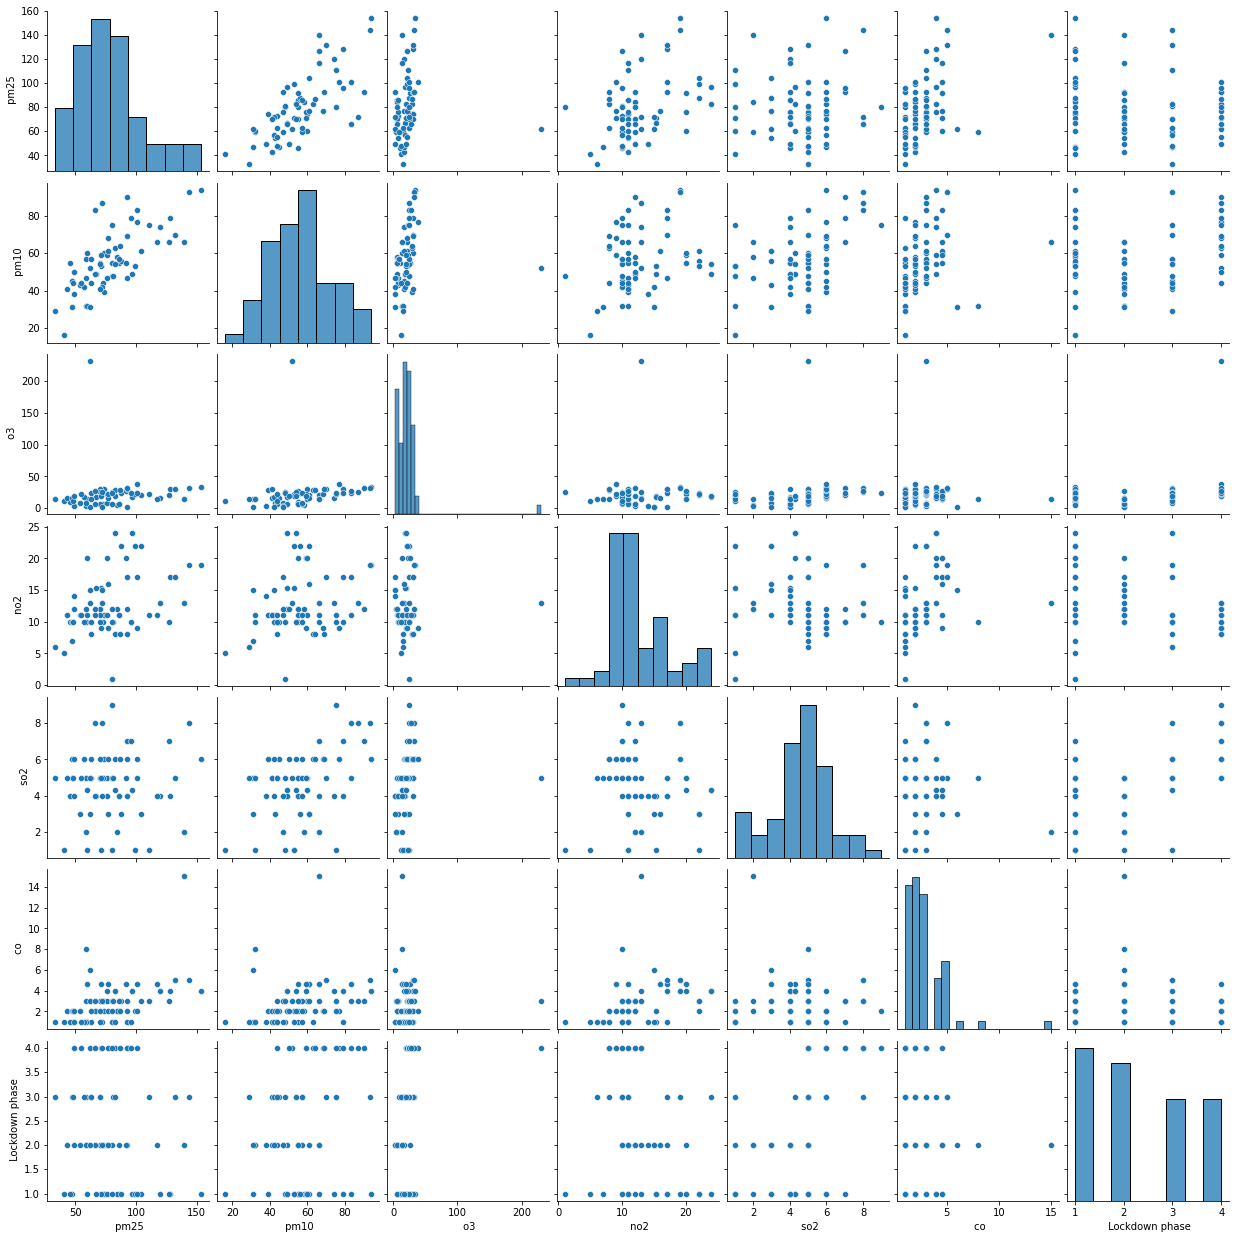

In [332]:
sns.pairplot(phase)

<AxesSubplot:xlabel=' Lockdown phase', ylabel=' co'>

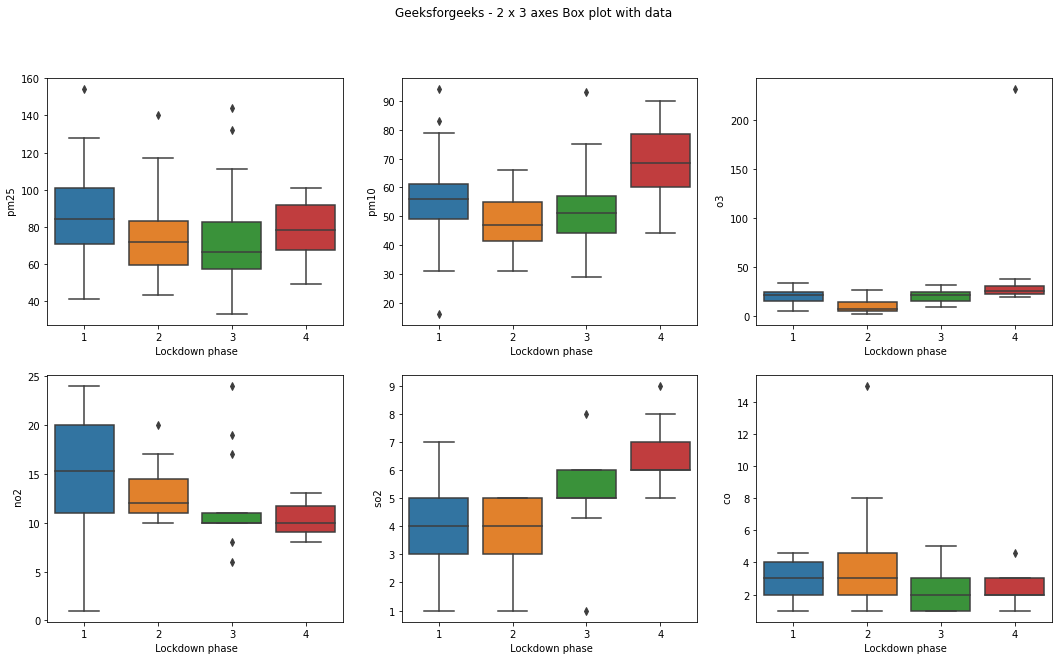

In [344]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
  
fig.suptitle('Geeksforgeeks - 2 x 3 axes Box plot with data')
sns.boxplot(ax=axes[0, 0], data=phase, x=' Lockdown phase', y=' pm25')
sns.boxplot(ax=axes[0, 1], data=phase, x=' Lockdown phase', y=' pm10')
sns.boxplot(ax=axes[0, 2], data=phase, x=' Lockdown phase', y=' o3')
sns.boxplot(ax=axes[1, 0], data=phase, x=' Lockdown phase', y=' no2')
sns.boxplot(ax=axes[1, 1], data=phase, x=' Lockdown phase', y=' so2')
sns.boxplot(ax=axes[1, 2], data=phase, x=' Lockdown phase', y=' co')

* Interesting point to note here is that in phase2 and phase3 of Nationwide lockdown, the values of pm25 and pm10 are lower, and with the ease in restriction in phase4, the value suddenly get back to normal.

In [353]:
phase.describe()

,pm25,pm10,o3,no2,so2,co,Lockdown phase
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,79.382353,56.161765,21.494118,12.611765,4.615735,2.818529,2.308824
std,26.033291,16.213695,27.351433,4.576596,1.784977,2.085176,1.123127
min,33.000000,16.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,61.500000,44.750000,12.000000,10.000000,4.000000,1.750000,1.000000
50%,75.000000,55.000000,19.000000,11.000000,5.000000,2.000000,2.000000
75%,93.000000,66.000000,25.000000,15.075000,6.000000,3.250000,3.000000
max,154.000000,94.000000,231.000000,24.000000,9.000000,15.000000,4.000000


* Still if we will compare it with the present [date](https://aqicn.org/city/hyderabad/)
* The values show that in each column the maximum values are not coming even near to the mean of the prevoius year data.

<AxesSubplot:xlabel=' pm25', ylabel='Density'>

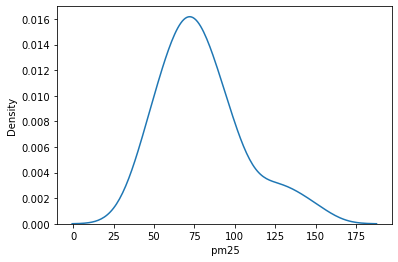

In [383]:
sns.kdeplot(phase[' pm25'])

<AxesSubplot:xlabel='date', ylabel=' pm25'>

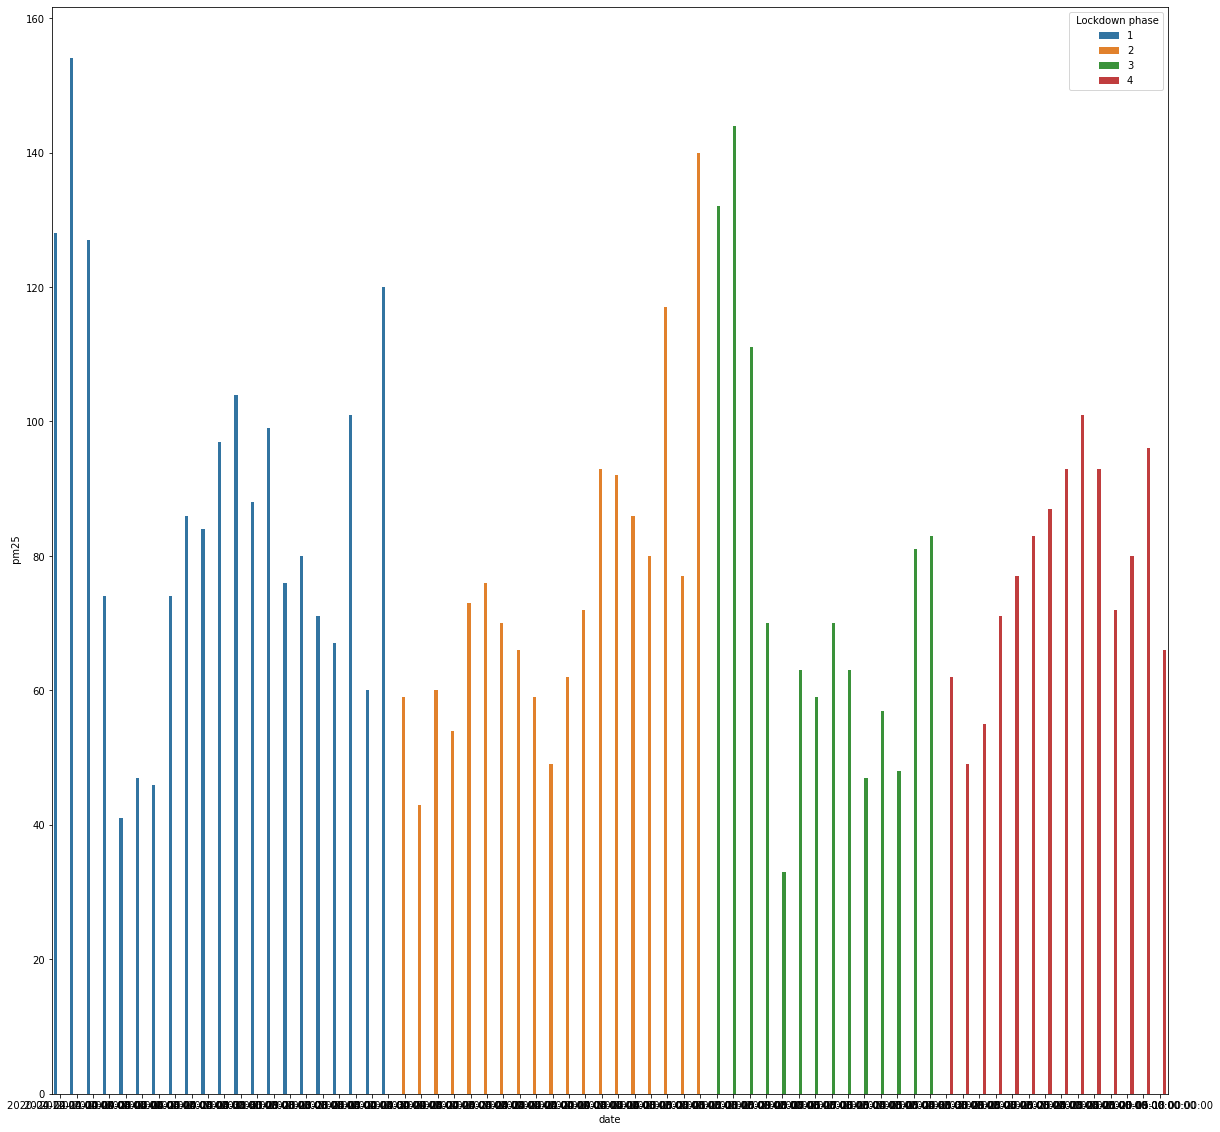

In [385]:
plt.figure(figsize=(20,20))
sns.barplot(x=phase.index[:],y=phase[' pm25'],hue=phase[' Lockdown phase'])

* Plot shows that in phase3 and phase4 the PM25 value is very less as compare to phase1 and phase2
* One important point to note here is that the impact of pollution will take some time to show in the atmosphere that is why each time the maximum level is reached after 3-5 days.

<AxesSubplot:xlabel='date', ylabel=' pm10'>

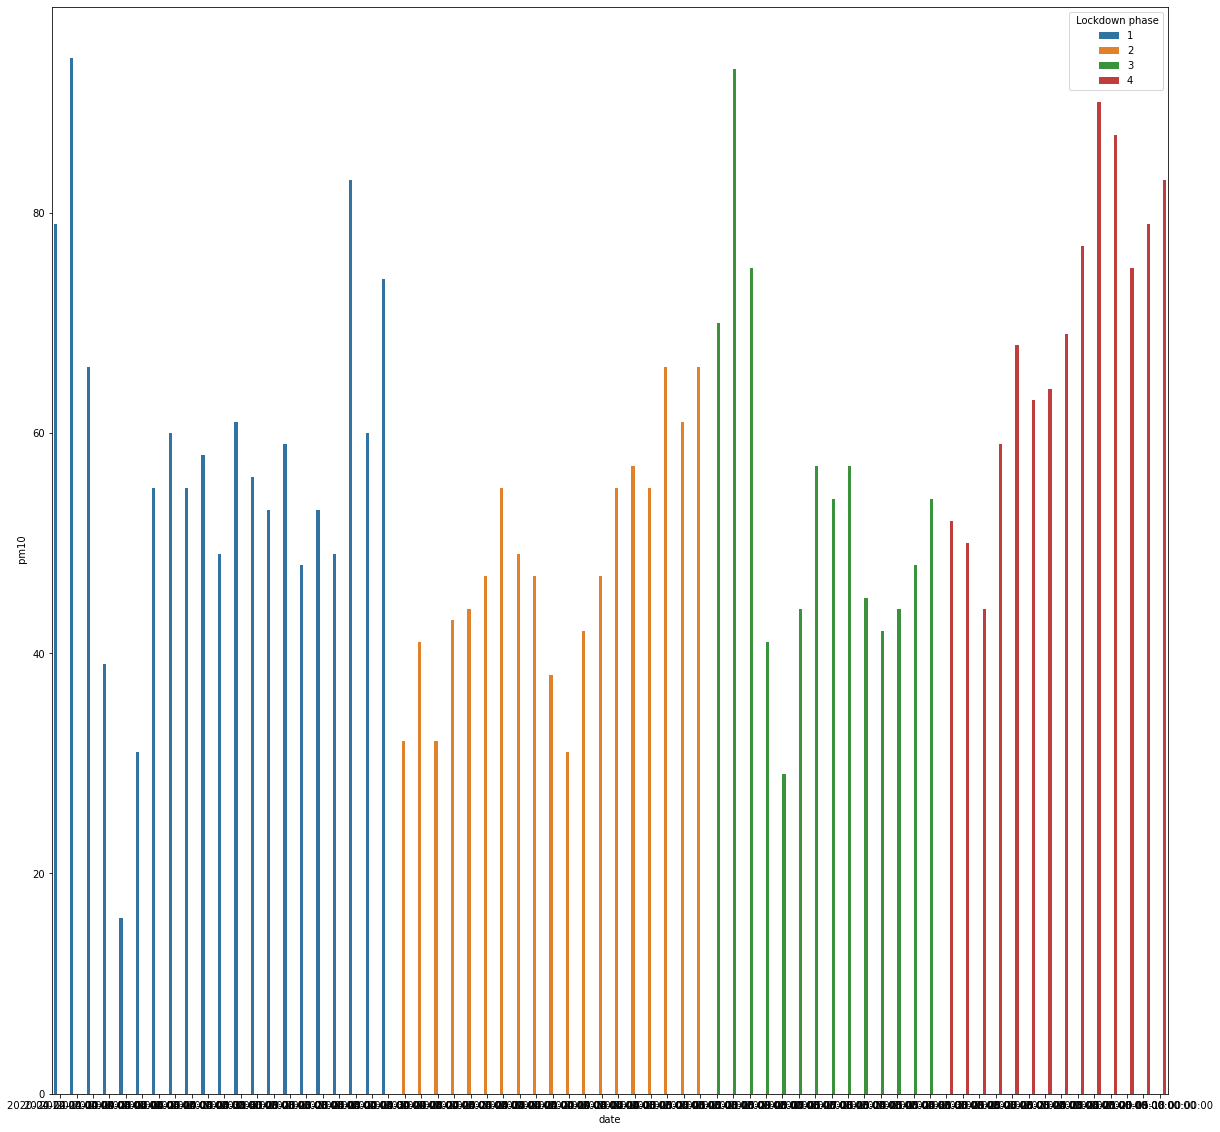

In [388]:
plt.figure(figsize=(20,20))
sns.barplot(x=phase.index[:],y=phase[' pm10'],hue=phase[' Lockdown phase'])

* Plot shows that PM10 which is more harmful atmospheric aerosol particles have increased the value in phase4
* While the average is pretty good in phase2 and phase3

<AxesSubplot:xlabel='date', ylabel=' no2'>

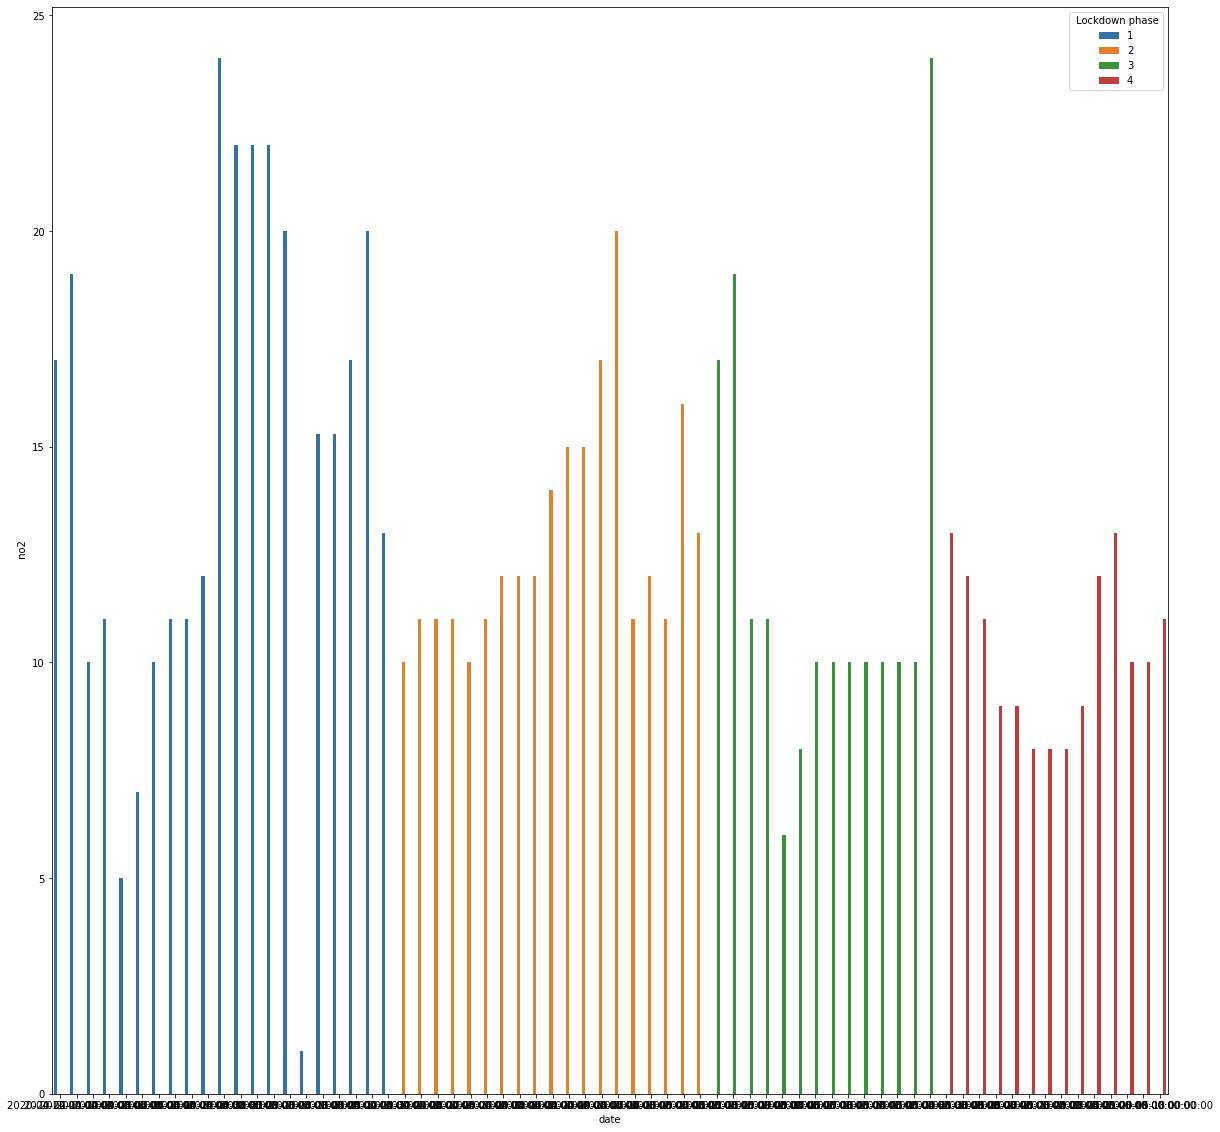

In [394]:
plt.figure(figsize=(20,20))
sns.barplot(x=phase.index[:],y=phase[' no2'],hue=phase[' Lockdown phase']) 

* In phase3 and phase4 NO2 values are also almost constant less than the harmful level. One of the reason is till that time the goverment haven't allowed the intercity travel.


<AxesSubplot:xlabel='date', ylabel=' so2'>

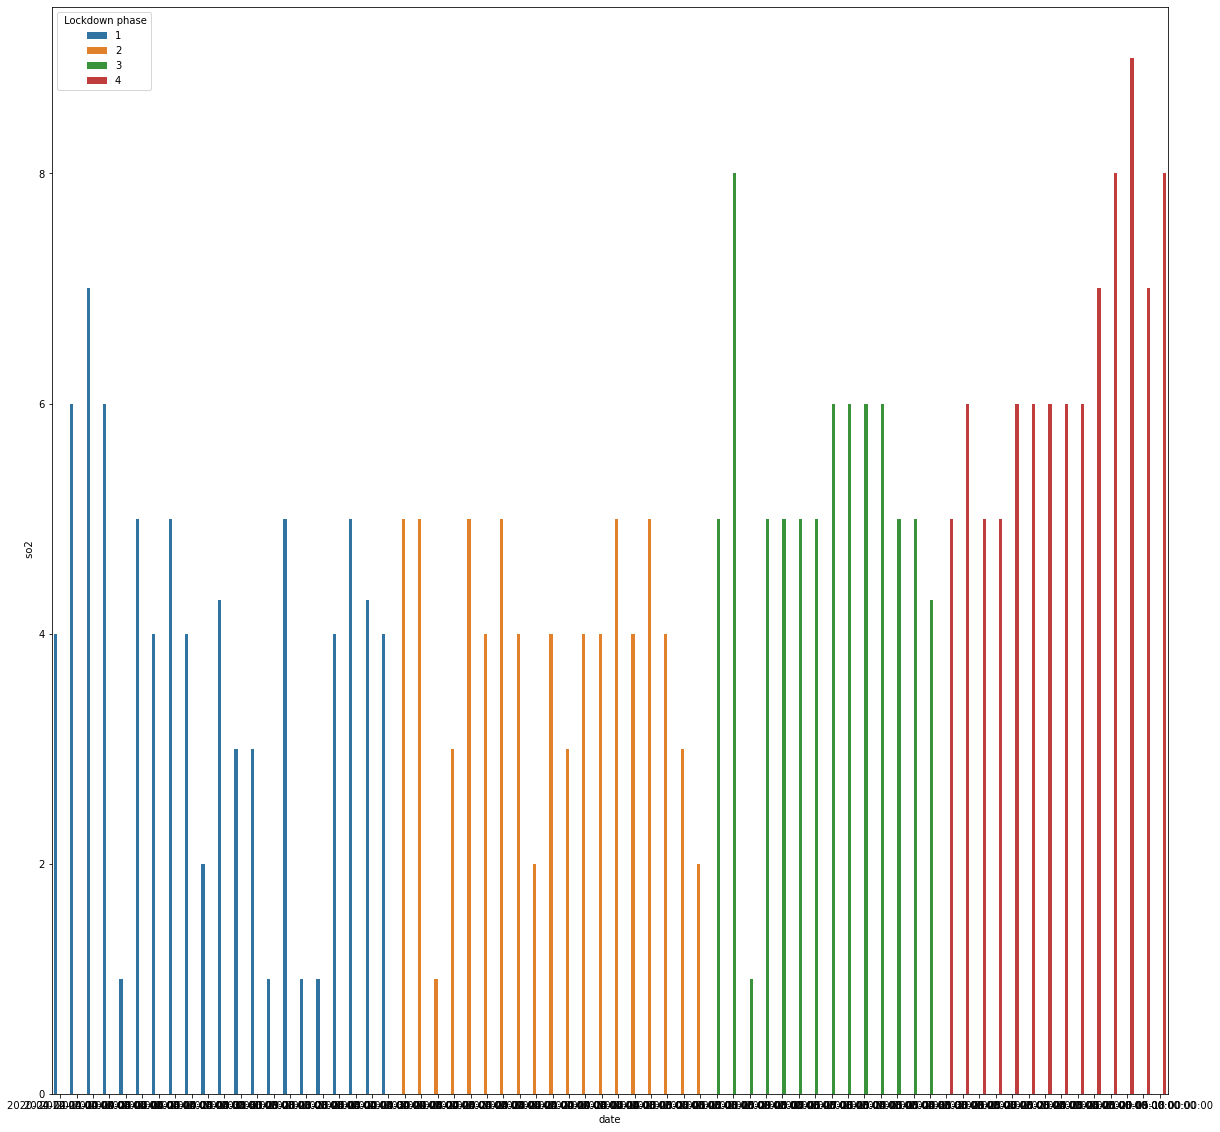

In [398]:
plt.figure(figsize=(20,20))
sns.barplot(x=phase.index[:],y=phase[' so2'],hue=phase[' Lockdown phase']) 

* The major reason for SO2 is burning of fossil fuels (coal and oil) and in phase1 and phase2 the goverment haven't allowed the functioning of some industries

# Conclusion :
### * Normally, the values will change after 3-5 days of the event. Thus, in most cases, when a new phase starts, the changes can be seen after a particular gap.
### * While in each section we have made certain assumptions to state the reason for different values, but in reality on such a large scale we can't surely say the main reason, as on metropolitical city level, many other factors are also present.